<a href="https://colab.research.google.com/github/Qwertst/ML_group/blob/main/Clustering/Reverse_clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sb
from google.colab import files
files.upload()

In [85]:
data=pd.read_csv("country.csv")

In [96]:
data=data.drop(['country'],axis=1)
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


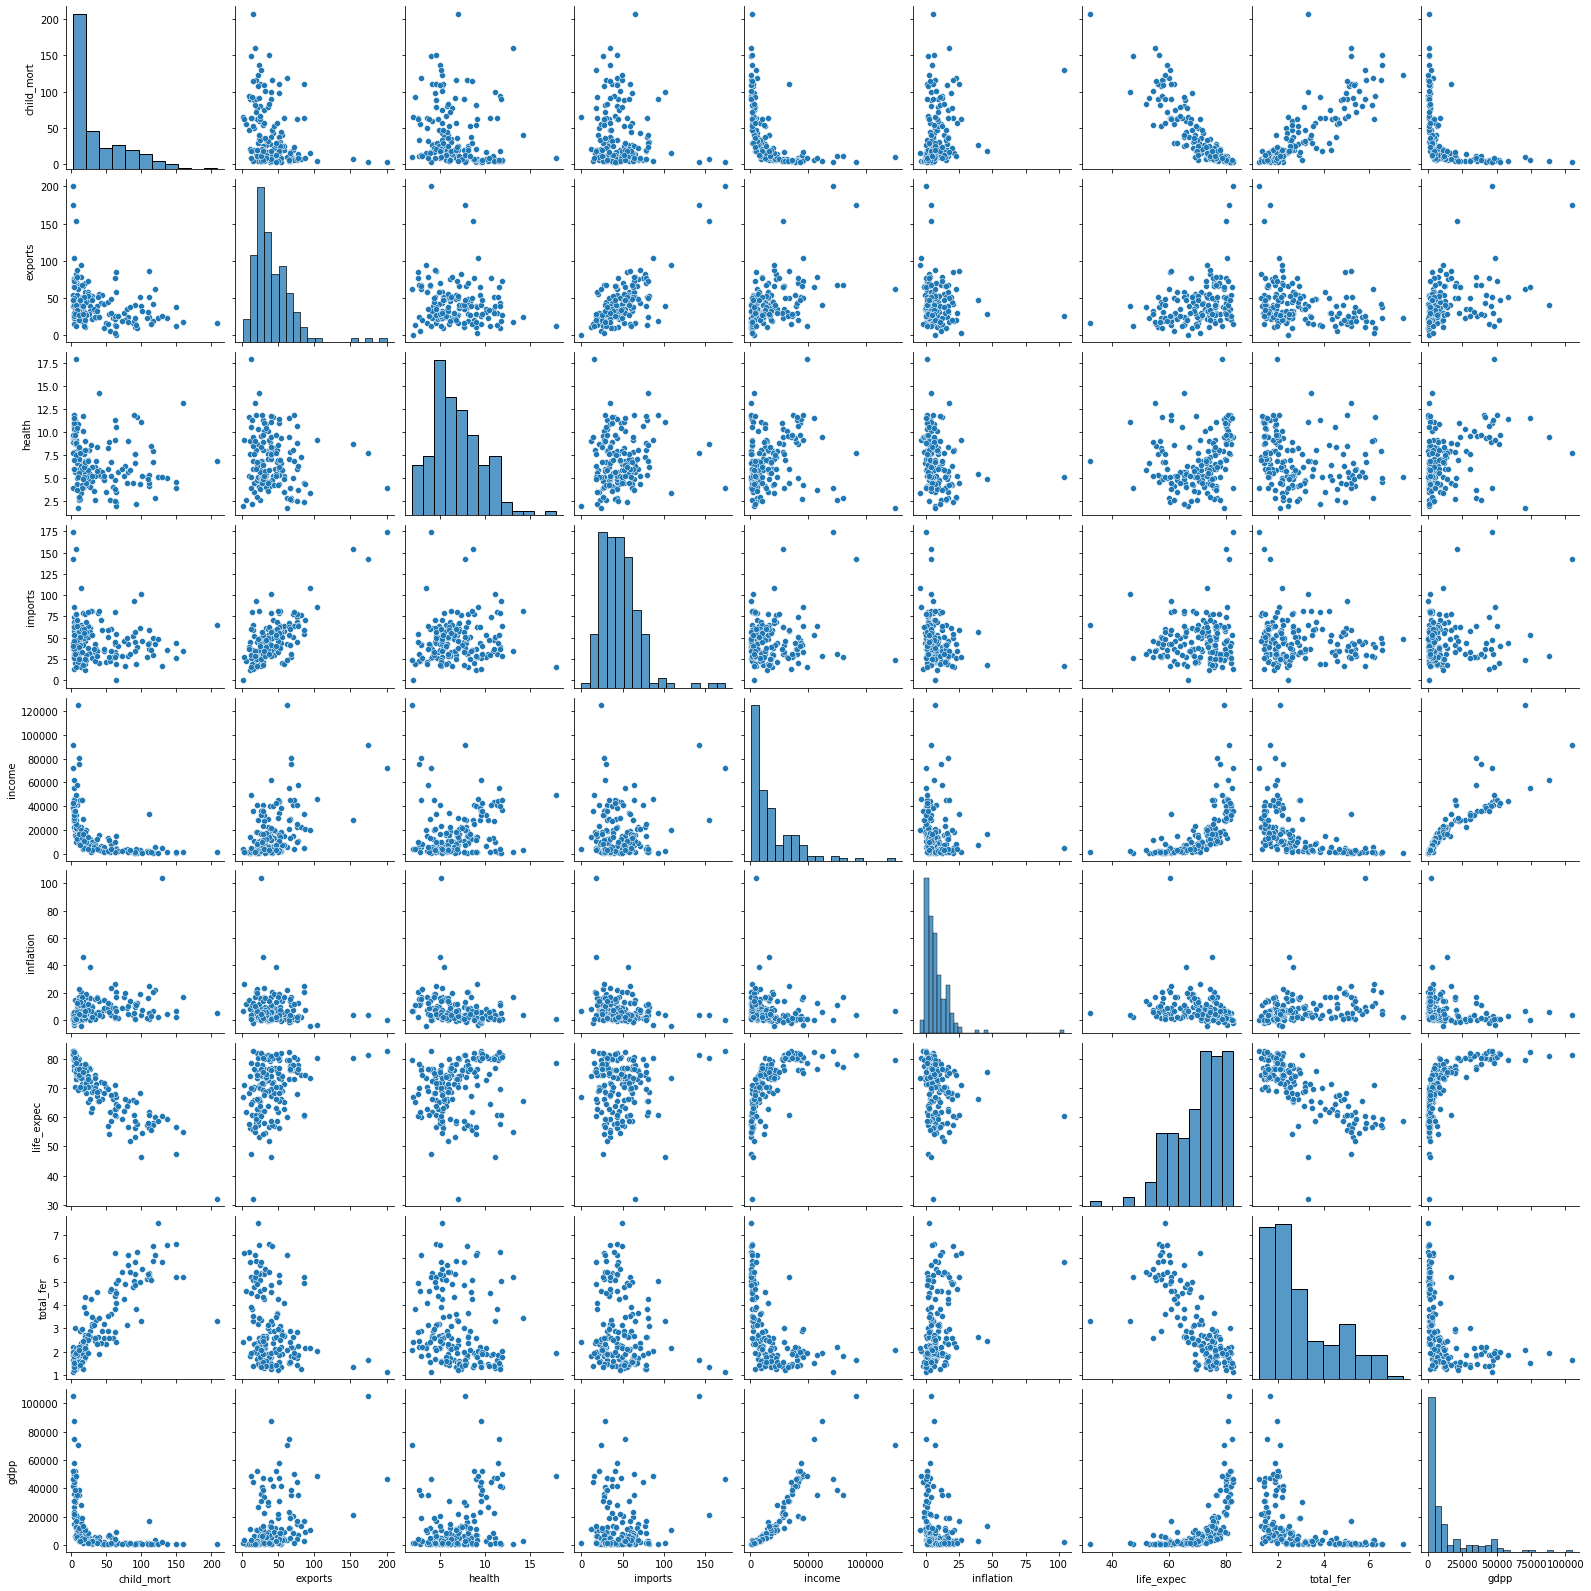

In [97]:
plot = sb.pairplot(data[['child_mort',	'exports',	'health',	'imports',	'income',	'inflation',	'life_expec',	'total_fer',	'gdpp']])
plot.savefig("output.png")


In [99]:
import numpy as np
from sklearn.preprocessing import StandardScaler

data.head()
X= np.asarray(data)

scale = StandardScaler()
X = scale.fit_transform(X)
X.shape

(167, 9)

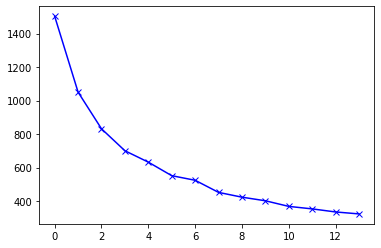

In [100]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
n_clusters=15
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(X)
    cost.append(kmean.inertia_)  
plt.plot(cost, 'bx-')
plt.savefig('elbow.png')

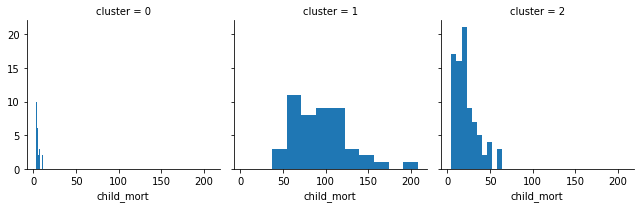

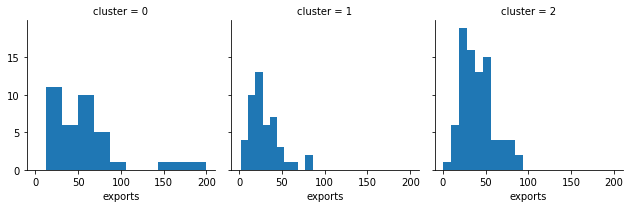

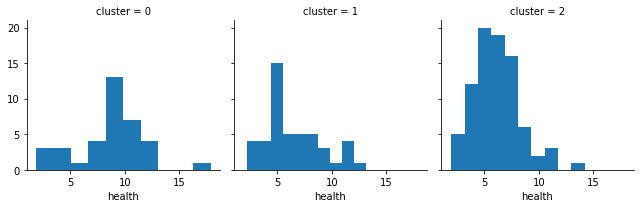

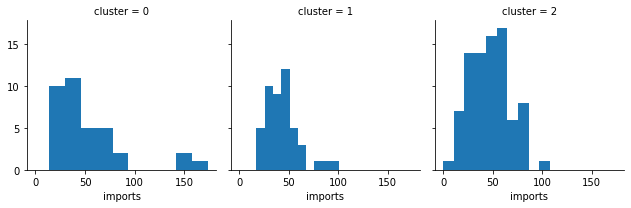

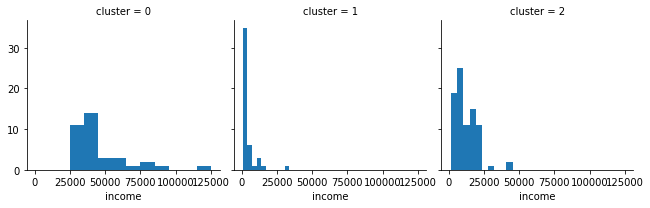

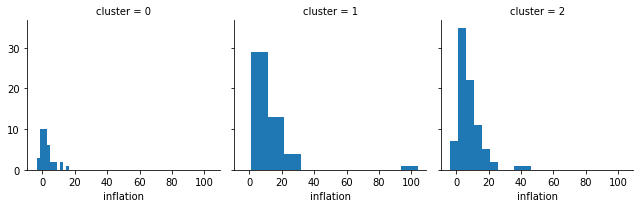

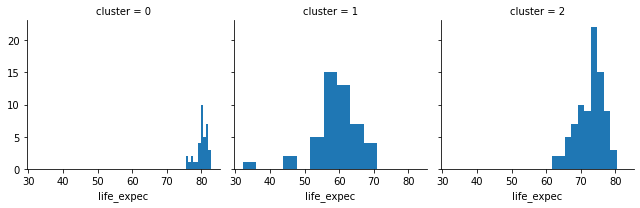

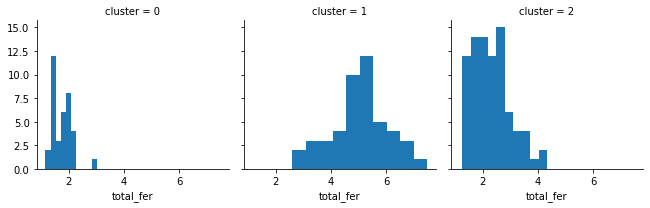

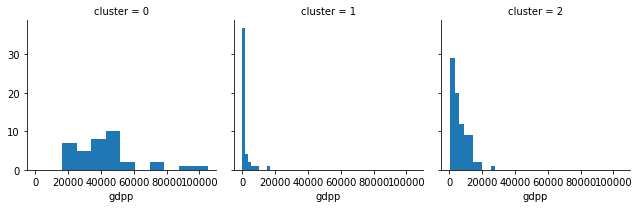

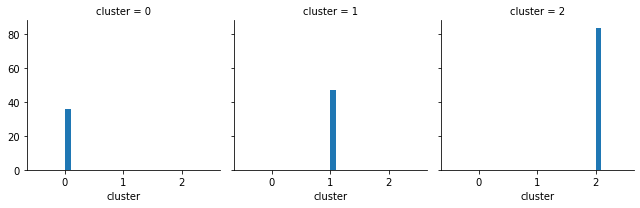

In [103]:
kmean= KMeans(3)
kmean.fit(X)
labels=kmean.labels_

clusters=pd.concat([data, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()
for c in clusters:
    grid= sb.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)